# Proyecto 10: Transformación de Datos

## Por Ricardo A. Del Río Guzmán

## Parte 0 - Preparación y Configuración


### Conexión con Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importación de Librerías


In [0]:
!pip install pyunpack
!pip install patool

In [0]:
# Estruturas de datos:
import pandas as pd
import numpy as np

# Visuaizaciones:
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de archivos:
from pyunpack import Archive
from os import getcwd, chdir, listdir, path, mkdir
import glob



# import datetime
# from scipy.stats import trim_mean as tm

# # Conecciones y consumo de APIs
# import requests
# import psycopg2

In [0]:
# Librerías Propias:
chdir('/content/drive/My Drive/__libreras_propias')
%run info_tables.ipynb
chdir('/content/drive/My Drive/Proyecto 10')

### Definiciones de Clases, Funciones y Variables

In [0]:
PATH = r'{0}content{0}drive{0}My Drive{0}Proyecto 10'.format(path.sep)
INPUT_CSV_DIR = 'input_csv_data'
PATH

'/content/drive/My Drive/Proyecto 10'

#### Funciones para Creación de Gráficos

In [0]:
def save_graph(name):
  org_dir = getcwd()
  chdir('/content/drive/My Drive/Proyecto 06/Imágenes')
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")
  chdir(org_dir)

def save_graph2(name):
  if not (name in listdir()):
    fig.savefig(name, bbox_inches="tight")

# def graph_p(hor_values, ver_values, g_type=0, 
#           hor_label='', ver_label='', title='', 
#           show_save=True, first=True, image=False):
#   options = {0: plt.plot, 1: plt.bar}
#   # Creación y configuración del gráfico:
#   if first:
#     fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
#                     edgecolor='k')
#     plt.tick_params(axis ='x', rotation = 60) 
#   options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
#   plt.xlabel(hor_label)
#   plt.ylabel(ver_label)
#   plt.title(title)
#   if image:
#     img = plt.imread("mapa-horizontal-completo.png")
#     plt.imshow(img)
#   # Se guarda el gráfico en el drive y se muestra:
#   if show_save:
#     save_graph(title.lower().replace(' ','_') + '.jpg')
    
#     plt.close() 


def analisis(db, name):
  print
  print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(name, db.shape[0], db.shape[1]))
  display(db.head(3))
  display(db.describe())
  display(db.describe().sum(axis=1))
  print('\n'+ '_'*200 + '\n')

def correlation_map(dataframe, titulo, annot=True):
  corr_pd = dataframe.corr()
  # Se filtran los valores, dejando solo los con una correlación mayor 
  # corr_pd = corr_pd[abs(corr_pd) >= 0.05]
  corr_pd = corr_pd[abs(corr_pd) >= 0.3]

  plt.figure(figsize=(15, 6))
  mask = np.zeros_like(corr_pd, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_pd,annot=annot, mask=mask, cmap='RdBu_r', center=0) 
  plt.title(titulo, fontsize=20)
  # save_graph(modify_text(titulo))
  plt.show()
  print()

def boxplot_graph(column, name, sec=False):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(column.values)
  plt.title('Boxplot de Columna ' + name, fontsize=20)
  if sec:
    # save_graph(modify_text('Boxplot limpio de Columna ' + name))
    pass
  else:
    # save_graph(modify_text('Boxplot de Columna ' + name))
    pass
  plt.show()


def null_graph(db, name):
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
  sns.heatmap(db.isnull(), cbar=False)
  plt.title('Valores Nulos en "{}"'.format(name), fontsize=20)
  # save_graph(modify_text('Valores Nulos en "{}"'.format(credit.name)))
  plt.show()
  display(db.info())
  print()

def outliers_graph(column, col_name, sec = False):
  # Cut the window in 2 parts
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      gridspec_kw={"height_ratios": (.15, .85)})

  plt.title('Outliers de "{}"'.format(col_name.replace('_',' ').title()))
  
  # Add a graph in each part
  sns.boxplot(column, ax=ax_box)
  sns.distplot(column, ax=ax_hist)
  
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')

  # if sec:
  #   save_graph(modify_text('Sin Outliers de "{}"'\
  #                          .format(col_name.replace('_',' ').title())))
  # elif not sec:
  #   save_graph(modify_text('Outliers de "{}"'\
  #                          .format(col_name.replace('_',' ').title())))
  
  plt.show()
  print()

#### Funciones para Modificación de Texto

In [0]:
def char(c):
  '''
  Cambia los carácteres que no son alfanuméricos por un guión bajo.
  '''
  if c.isalnum():
    return c
  return '_'


def modify_text(text, lenght=25):
  '''
  Convierte un texto a "snake_case" con un máximo de carácteres dado.
  '''
  return ''.join(map(char, text)).lower()[:lenght+1]

def pretty(txt):
  '''
  Toma un texto en "snake_case" y lo transforma a "Title Case"
  '''
  return txt.replace('_',' ').title()

#### Funciones Para Reemplazar Valores

In [0]:
def replace(org_values, old_values, new_values):
  '''
  org_values: Estructura de datos iterable y unidimensional con los datos 
    originales.
  old_values: Valor único o lista de valores que se desean reemplazar de la 
    estructura 'org_values'.
  new_values: Valores por los que se desea reemplazar cada uno de los valores
    de 'old_values'. La cantidad de elementos en ambos iterables deben 
    coincidir.

  Está función retorna una estructura de datos en la que fueron reemplazados los
  valores indicados de la estructura original por los valores respectivos
  '''

  


### Formatos y Configuraciones

In [0]:
# Carga una versión anterior de matplotlib, para que los gráficos heatmaps no
# se corten en la base:
!pip install matplotlib==3.1.0

In [0]:
# Formato de los gráficos:
sns.set(style='whitegrid')

### Descompresión de los Archivos

In [0]:
if not INPUT_CSV_DIR in listdir():
  mkdir(INPUT_CSV_DIR)
  Archive(path.join(PATH, glob.glob('*.rar')[0]))\
          .extractall(INPUT_CSV_DIR)
  print('Se extrajeron los archivos del archivo comprimido.')
else:
  print('Ya habían sido extraídos los archivos de la carpeta comprimida.')

Ya habían sido extraídos los archivos de la carpeta comprimida.


### Links de referencia y de utilidad:

https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62
https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/


## Parte 1 - Algunas librerías, funciones y principios de utilidad

### 1) Comentario de Aplicación de Nuevas Funcionalidades

Comente, a partir del punto b2, qué funcionalidades les llamaron la atención y por tanto instalaron en su entorno. Ya finalizado todo el proyecto, indique qué herramientas indicadas en b1 y b2 utilizó y de qué forma.


**COMENTARIOS**

Debido a la comodidad de tener los archivos en la nube y poder trabajar en ellos desde cualquier lugar opté por trabajar con Google Colaboratory, por lo que hubo algunas funcionalidades de Jupyter Notebook que no pude probar.

De todos modos Google Colaboratory ya tiene incluidas algunas de las funcionalidades adicionales de Jupyter, dentro de las cuales la que más me gusta es el autoguardado de los cambios en el archivo.

## Parte 2 - Carga de Datos

### 2) Carga de Múltiples Archivos 

Investigue sobre el uso de la librería glob, para la lectura de múltiples archivos, y utilicela para la carga de datos. 

Hint: Podría serle de utilidad también el utilizar la librería os.

In [0]:
# Se corrobora que todos los csv tienen las mismas columnas:
lst = []
for file in listdir(INPUT_CSV_DIR):
  lst.append(list(pd.read_csv(INPUT_CSV_DIR + path.sep + file, sep=';').columns))

lst[1:] == lst[:-1]

True

In [0]:
# Se genera un iterador con todos los archivos a cargar:
all_files = glob.iglob(path.join(PATH, INPUT_CSV_DIR, "*.csv"))
# Se convierte cada archivo en un data frame:
df_from_each_file = (pd.read_csv(f, sep=';') for f in all_files)
# Se concatenan todos los dataframes:
region7_df   = pd.concat(df_from_each_file, ignore_index=True)
region7_df

,Unnamed: 0,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12,P12COMUNA,P12PAIS,P12A_LLEGADA,P12A_TRAMO,P13,P14,P15,P15A,P16,P16A,P16A_OTRO,P17,P18,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R,REGION_PROVINCIA_COMUNA
0,12391546,99.0,1.0,999.0,14281.0,159.0,1.0,2.0,2.0,2.0,57.0,1.0,98.0,998.0,2.0,98.0,998.0,2.0,7308.0,998.0,9998.0,98.0,2.0,3.0,7.0,2.0,2.0,98.0,98.0,6.0,98,NaN,3.0,12.0,1993.0,998.0,998.0,998.0,11.0,98.0,7.0,73.0,7301.0,98.0,98.0,7308.0,7_73_7301
1,12806602,13.0,1.0,6.0,2848.0,48.0,1.0,1.0,1.0,2.0,68.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,4.0,7.0,1.0,2.0,98.0,98.0,8.0,98,3.0,3.0,9.0,1977.0,998.0,998.0,998.0,12.0,98.0,7.0,71.0,7101.0,98.0,98.0,98.0,7_71_7101
2,11935619,4.0,1.0,1.0,10801.0,613.0,1.0,4.0,7.0,1.0,75.0,3.0,13124.0,998.0,3.0,13124.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,2.0,9.0,2.0,2.0,98.0,98.0,1.0,H,98.0,98.0,98.0,9998.0,998.0,998.0,998.0,8.0,98.0,7.0,74.0,7404.0,13124.0,13124.0,98.0,7_74_7404
3,11943658,5.0,1.0,1.0,4784.0,1074.0,1.0,1.0,1.0,1.0,36.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,1.0,7.0,2.0,2.0,98.0,98.0,1.0,F,98.0,98.0,98.0,9998.0,998.0,998.0,998.0,9.0,98.0,7.0,74.0,7404.0,98.0,98.0,98.0,7_74_7404
4,12252283,3.0,1.0,1.0,2504.0,773.0,1.0,4.0,5.0,2.0,24.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,4.0,12.0,1.0,2.0,98.0,98.0,5.0,98,0.0,98.0,98.0,9998.0,998.0,998.0,998.0,16.0,98.0,7.0,73.0,7301.0,98.0,98.0,98.0,7_73_7301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11974123,5.0,2.0,24.0,661.0,126.0,1.0,2.0,2.0,2.0,88.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,3.0,98.0,98.0,98.0,2.0,98.0,98.0,7.0,98,7.0,7.0,9.0,1972.0,998.0,998.0,998.0,0.0,98.0,7.0,74.0,7403.0,98.0,98.0,98.0,7_74_7403
49996,12339928,10.0,1.0,2.0,4667.0,136.0,1.0,2.0,4.0,1.0,57.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,8.0,5.0,1.0,2.0,98.0,98.0,4.0,98,98.0,98.0,98.0,9998.0,998.0,998.0,998.0,8.0,98.0,7.0,73.0,7301.0,98.0,98.0,98.0,7_73_7301
49997,12207431,4.0,1.0,2.0,13035.0,1050.0,1.0,4.0,5.0,2.0,18.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,4.0,8.0,1.0,2.0,98.0,98.0,1.0,Q,0.0,98.0,98.0,9998.0,998.0,998.0,998.0,12.0,98.0,7.0,73.0,7304.0,98.0,98.0,98.0,7_73_7304
49998,12204284,4.0,1.0,1.0,5994.0,1839.0,1.0,2.0,2.0,2.0,54.0,1.0,98.0,998.0,2.0,98.0,998.0,2.0,13109.0,998.0,9998.0,98.0,2.0,4.0,7.0,1.0,2.0,98.0,98.0,6.0,98,2.0,2.0,10.0,2003.0,998.0,998.0,998.0,12.0,98.0,7.0,73.0,7304.0,98.0,98.0,13109.0,7_73_7304


In [0]:
# # Se define la ubicación donde se guardarán los datos de las columnas y 
# # categorías:
# DataBaseTable.set_dir(PATH)
# # Se carga la información de las columnas y categorías de cada tabla:
# DataBaseTable('CENSO 7ma Region', df=region7_df)

## Parte 3 - Preprocesamiento y Transformación de Datos

### 3) Tratamiento de Nulos

Para el archivo de datos asignados realice una identificación de los datos nulos. Además, explique el tratamiento de estos detalladamente. Esto quiere decir, en caso de que tome la determinación de mantener, eliminar o imputar estos datos, indique el procedimiento que utilizó y el porqué de su decisión.
Indique el tamaño del DataFrame previo y posterior a la realización de este punto.

Hint: utilice el pdf adjunto al anunciado para identificar los valores utilizados para indicar qué datos están asignados como ‘missing’ o ‘no aplica’. Recuerde que no siempre los datos NaN vienen ya codificados como tales en una base de datos.


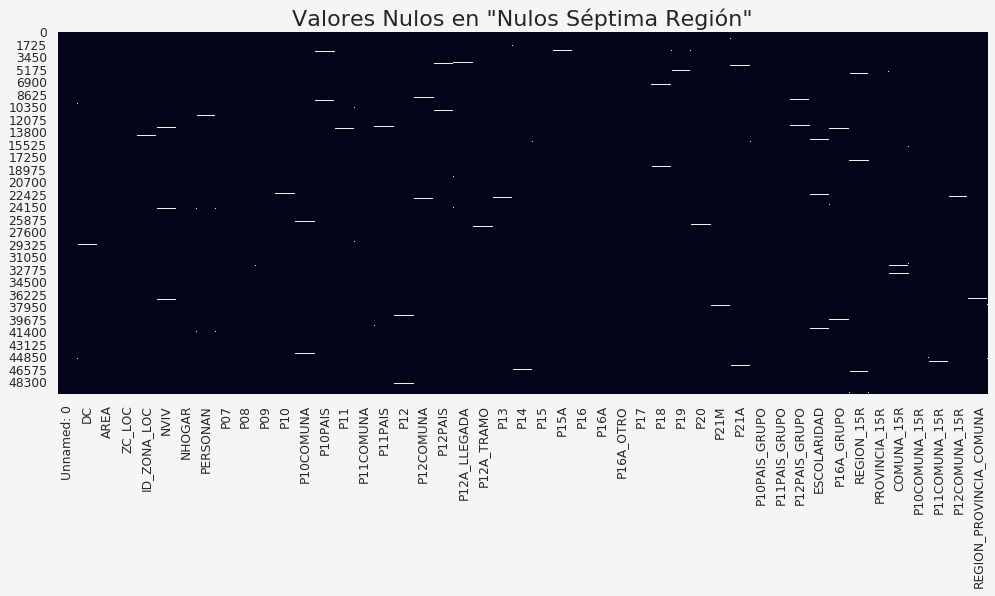

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
Unnamed: 0                 50000 non-null int64
DC                         49870 non-null float64
AREA                       49863 non-null float64
ZC_LOC                     49877 non-null float64
ID_ZONA_LOC                49878 non-null float64
NVIV                       49892 non-null float64
NHOGAR                     49885 non-null float64
PERSONAN                   49870 non-null float64
P07                        49870 non-null float64
P08                        49884 non-null float64
P09                        49872 non-null float64
P10                        49875 non-null float64
P10COMUNA                  49864 non-null float64
P10PAIS                    49883 non-null float64
P11                        49852 non-null float64
P11COMUNA                  49881 non-null float64
P11PAIS                    49871 non-null float64
P12                        49869 non-null f

None

In [0]:
null_graph(region7_df, 'Nulos Séptima Región')

In [0]:
region7_df.describe()

,Unnamed: 0,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12,P12COMUNA,P12PAIS,P12A_LLEGADA,P12A_TRAMO,P13,P14,P15,P15A,P16,P16A,P16A_OTRO,P17,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R
count,5.000000e+04,4.987000e+04,49863.000000,4.987700e+04,4.987800e+04,4.989200e+04,49885.000000,49870.000000,4.987000e+04,49884.000000,4.987200e+04,49875.000000,4.986400e+04,4.988300e+04,49852.000000,4.988100e+04,4.987100e+04,4.986900e+04,4.987400e+04,4.988500e+04,4.988100e+04,4.988100e+04,49875.000000,4.987500e+04,4.987300e+04,4.987000e+04,4.984800e+04,4.988700e+04,4.989600e+04,4.988800e+04,4.986200e+04,4.988200e+04,4.985700e+04,4.986500e+04,4.988900e+04,4.987200e+04,4.987100e+04,4.988900e+04,4.987700e+04,4.985500e+04,4.989500e+04,4.986700e+04,4.986700e+04,4.987100e+04,4.988200e+04
mean,1.234093e+07,4.163670e+02,105.349879,4.881777e+02,5.508216e+05,2.841028e+04,65.960770,128.962883,4.688291e+02,120.382287,1.321381e+03,100.146085,2.917219e+04,6.081750e+04,152.497573,5.190441e+04,6.783397e+04,3.426379e+02,2.805830e+05,7.601703e+04,8.497531e+05,6.934044e+03,114.575599,9.676793e+02,7.565156e+02,9.891801e+02,5.069788e+02,6.877747e+03,7.314366e+03,1.673551e+03,3.380904e+03,5.289039e+03,6.526161e+03,3.094398e+05,9.961848e+04,8.544341e+04,7.772396e+04,6.624163e+02,6.408760e+03,5.840696e+02,4.508105e+03,4.633111e+05,7.244037e+03,9.976926e+04,2.063495e+05
std,3.025032e+05,2.303870e+04,4416.420129,3.810206e+04,2.814653e+07,2.262679e+06,3081.182497,6653.100035,2.424961e+04,5617.239460,9.353286e+04,4023.044428,5.097966e+06,3.044187e+06,6740.215065,6.978627e+06,3.093538e+06,5.779931e+04,1.918673e+07,3.425852e+06,3.599006e+07,3.170133e+05,5423.767643,1.000316e+05,5.471361e+04,1.178127e+05,8.008654e+04,3.142219e+05,3.172871e+05,1.401449e+05,2.235751e+05,2.775517e+05,3.117553e+05,2.027953e+07,3.853554e+06,3.621532e+06,3.472672e+06,3.448757e+04,2.930168e+05,2.476418e+04,2.175821e+05,2.202680e+07,3.225344e+05,9.834804e+06,1.509847e+07
min,1.181676e+07,1.000000e+00,1.000000,1.000000e+00,4.300000e+01,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000,9.800000e+01,3.200000e+01,1.000000,9.800000e+01,3.600000e+01,1.000000e+00,9.800000e+01,3.600000e+01,1.950000e+03,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.942000e+03,5.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00,7.100000e+01,7.101000e+03,9.800000e+01,9.800000e+01,9.800000e+01
25%,1.207812e+07,3.000000e+00,1.000000,1.000000e+00,3.764000e+03,1.150000e+02,1.000000,1.000000,1.000000e+00,1.000000,1.800000e+01,1.000000,9.800000e+01,9.980000e+02,2.000000,9.800000e+01,9.980000e+02,1.000000e+00,9.800000e+01,9.980000e+02,9.998000e+03,9.800000e+01,1.000000,3.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,9.800000e+01,9.800000e+01,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.013000e+03,9.980000e+02,9.980000e+02,9.980000e+02,5.000000e+00,9.800000e+01,7.000000e+00,7.100000e+01,7.102000e+03,9.800000e+01,9.800000e+01,9.800000e+01
50%,1.234224e+07,5.000000e+00,1.000000,3.000000e+00,7.599000e+03,3.630000e+02,1.000000,2.000000,4.000000e+00,2.000000,3.500000e+01,1.000000,9.800000e+01,9.980000e+02,2.000000,9.800000e+01,9.980000e+02,1.000000e+00,9.800000e+01,9.980000e+02,9.998000e+03,9.800000e+01,2.000000,4.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,9.800000e+01,9.800000e+01,5.000000e+00,9.800000e+01,9.800000e+01,9.800000e+01,9.998000e+03,9.980000e+02,9.980000e+02,9.980000e+02,9.000000e+00,9.800000e+01,7.000000e+00,7.300000e+01,7.301000e+03,9.800000e+01,9.800000e+01,9.800000e+01
75%,1.260460e+07,9.000000e+00,2.000000,8.000000e+00,1.192200e+04,7.860000e+02,1.000000,3.000000,5.000000e+00,2.000000,5.400000e+01,1.000000,9.800000e+01,9.980000e+02,2.000000,9.800000e+01,9.980000e+02,2.000

### 4) Tratamiento de 'Outliers'

Realice la identificación de datos anómalos u outliers. Al igual que el punto anterior, debe detallar todo el tratamiento el cual explique el porque identifica esos valores como outliers, el procedimiento de identificación (que técnicas utilizó) y qué hará con ellos (se mantienen, se eliminan o se imputan).

Indique el tamaño del DataFrame previo y posterior a la realización de este punto


In [0]:
for col_name in region7_df.columns:
  try:
    outliers_graph(region7_df[col_name].dropna(), col_name)
  except:
    print(f'--\nLa columna "{col_name}" no se puede graficar.\n--\n\n')

In [0]:
region7_df.boxplot(figsize=(15,6), rot=90)

In [0]:
list(region7_df.columns)

In [0]:
' formato (lim inf, lim sup, num fuera de rango a conservar)'

value_ranges_dic = {
    'DC':          (1,99),
    'AREA':        (1,2),
    'ZC_LOC':      (1,999),
    'ID_ZONA_LOC': (1,16053),
    'NVIV':        (1,4296),
    'NHOGAR':      (1,36),
    'PERSONAN':    (1,9999),
    'P07':         (1,19),
    'P08':         (1,2),
    'P09':         (0,100),
    'P10':         (1,4,98),
    'P10COMUNA':   (997,15202,998),
    'P10PAIS':     (0,997,998),
    'P11':         (1,9,98),
    'P11COMUNA':   (997,15202,998),
    'P11PAIS':     (0,997,998),
    'P12':         (1,8,98),
    'P12COMUNA':   (997,15202,998),
    'P12PAIS':     (0,997,998),
    'P12A_LLEGADA':(1950,2017,9998),
    'P12A_TRAMO':  (1,4,98),
    'P13':         (1,3,98),
    'P14':         (0,8,98),
    'P15':         (1,14,98),
    'P15A':        (1,2,98),
    'P16':         (1,2,98),
    'P16A':        (1,10,98),
    'P16A_OTRO':   (1,97,98),
    'P17':         (1,8,98),
    'P19':         (0,23,98),
    'P20':         (0,23,98),
    'P21M':        (1,12,98),
    'P21A':        (1890,2017,98),
    'P10PAIS_GRUPO': (0,997,998),
    'P11PAIS_GRUPO': (0,997,998),
    'P12PAIS_GRUPO': (0,997,998),
    'ESCOLARIDAD':   (0,21,98),
    'P16A_GRUPO':    (1,10,98),
    'REGION_15R':    (1,15),
    'PROVINCIA_15R': (11,152),
    'COMUNA_15R':    (1101,15202),
    'P10COMUNA_15R': (997,15202,998),
    'P11COMUNA_15R': (997,15202,998),
    'P12COMUNA_15R': (997,15202,998)
}

alpha = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p',
         'q','r','s','t','u','v','w','x','y','z']

#     'REGION_PROVINCIA_COMUNA': 


#     'NVIV': (0,9999)
#     'P01': (1,10),
#     'P02': (1,4),
#     'P03A': (1,6, 98),
#     'P03B': (1,7,98),
#     'P03C': (1,5,98),
#     'P04': (0,6,98),
#     'P05': (1,4,98),
#     'CANT_HOG': (0,36),
#     'CANT_PER': (0,9999),
#     'REGION_15R': (1,15),
#     'PROVINCIA_15R': (11,152),
#     'COMUNA_15R': (1101,15202),
# }

# null_values_dic = {
#     'P03A' = (99)
# }

In [0]:
def letter_to_num(l):
  if isinstance(l,str):
    if l == '98':
      return 98
    elif l.lower() in alpha:
      return alpha.index(l.lower().strip()) + 1
    return np.nan
  return l

# 

In [0]:
if region7_df.P18.dtype == 'object':
  region7_df.P18 = [letter_to_num(x) for x in region7_df.P18]
  region7_df.P18.describe()

In [0]:
# def change_values(value, *args):
#   # Si es un número fuera de rango:
#   if isinstance(value, int) or isinstance(value, float):
#     if len(args) == 3 and (not value in range(args[0], args[1]+1)):
#       if value != args[2]:
#         # Se remplaza por nan:
#         return np.nan
#   # Si el valor es nulo o está dentro del rango solo se retorna:
#   return value 
  

In [0]:
def change_values(value, *args):
  # Si es un número fuera de rango:
  if not value in range(args[0], args[1]+1):
    # El número es distinto al que indica "no aplica":
    if len(args) == 3:
      if value != args[2]:
        return np.nan
    # No hay números aceptados que estén fuera del rango:
    else:
      return np.nan
  # Si el valor es nulo o está dentro del rango o es otro valor aceptado,
  # solo se retorna:
  return value 

In [0]:
len(region7_df.P08.unique())

In [0]:
# Si no se han eliminado los outliers:
if len(region7_df.P08.unique()) > 3:

  print('-'*100, '\n\nELIMINACIÓN DE OUTLIERS Y ASIGNACIÓN DE NULOS\n', 
          '(paciencia, tarda un poco...)\n\n','-'*100, '\n')
  # Se revisa cada columna en el diccionario:
  for col_name in value_ranges_dic:
    print(f'Trabajando con la columna {col_name}')
    print('\tLa columna tiene {} valores únicos.\n\tProcesando...'.format(len(region7_df[col_name].unique())))
    # Se determina si el valor está el el rango correcto o se cambia por nan:
    region7_df[col_name] = [change_values(x, *value_ranges_dic[col_name]) \
                            for x in region7_df[col_name]]
    print('\tLa columna tiene {} valores únicos.\n'\
        .format(len(region7_df[col_name].unique())))
  print('\n\nTerminado!')
else:
  print('Los outliers ya habían sido eliminados')

In [0]:
region7_df.P08.describe()

In [0]:
print('Cantidad de nulos:')
sum(region7_df.P08.isna())

### 5) Separar Columnas con Varias Variables

Procese las columnas que contengan más de una variable en sus registros. Indique qué columnas son y qué variables contiene. Sepárelas indicando paso a paso cuál fue el proceso que utilizó para la limpieza de estas variables.


### 6) Identificar Tipos de Variables de las Columnas

Indique qué variables son categóricas o numéricas. Una vez identificadas, proceda a la conversión del tipo de variables según la clasificación que ud haya realizado. Luego de ello, recodifique las variables con nombres autocontenidos.


## Parte 4 -  Análisis Exploratorio


### 7) Análisis, Construcción de Rangos y Binarización

Genere un análisis acabado para los siguientes temas que se desprenden del CENSO 2017. A modo de ejemplo, puede utilizar alguna de las siguientes variables de interés: Fecundidad, Pueblos indígenas y originarios, Educación, Migración, o rama de actividad económica.

Se requiere que realicen al menos dos “binning” o construcción de rangos en torno a los datos entregados. Hint: Puede apoyarse de función pd.cut. Junto a lo anterior, también se requiere de al menos dos binarizaciones de variables.

Para cada concepto solicitado deberá adjuntar las tablas y gráficos pertinentes junto a las conclusiones que se desprendan del análisis realizado por ud. Para graficar, puede utilizar todas las herramientas vistas en el transcurso del programa (matplotlib y seaborn). Se considerará si el gráfico seleccionado es acorde con el análisis que se presenta además de la creación y utilización de funciones para poder graficar.

En este punto se requerirá de al menos 5 análisis concernientes a los datos. Es decir, no bastará con generar los gráficos, sino que se debe justificar la pertinencia del mismo, y extraer conclusiones relevantes y no evidentes de los mismos. Si se presenta un gráfico que no aporta valor al análisis, este NO será contabilizado.


In [0]:
uno, dos, tres, cuatr, cinco, seis = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

In [0]:
uno

## Parte 5 -  Herramientas de Análisis

### 8) Estudio Correlacional

Desarrolle un estudio correlacional para los dos set de datos. Destaque los coeficientes de Pearson que para ud sean significativos. En base esto, realice un análisis bivariado entre los atributos que presentan una alta correlación. Si es necesario, recodifique las variables que utilizará para la construcción de la matriz (binarizar). Utilice gráficos de dispersión y adjunte un análisis claro que se desprenda de este.


In [0]:
correlation_map(region7_df, 'Censo 7ma Región', annot=False)

In [0]:
correlation_map(region7_df.loc[:,'P11':'P12A_LLEGADA'], 'Censo 7ma Región')

### 9) Prueba T

Prueba (Test) t de comparación de medias para dos muestras independientes: En proyectos anteriores ya hemos utilizado de forma implícita este test, a la hora de evaluar la significancia de variables en un modelo de regresión lineal. Estudie los usos más comunes de este test.

A partir de lo anterior, elija al menos 3 variables donde utilizar este test, comparando las medias regionales y nacionales que resulten de su interés. Concluya en torno al rechazo o no del test, y cual es la implicancia de ello para el análisis generado.


### 10) Bonus: Regresión Lineal o Análisis Factorial: 

Investigue y proponga la realización de alguno de estos dos análisis, en función de su pertinencia para estos casos. También puede investigar en torno a la confección de clusters para agrupar a los datos.


## Parte 6 -  Cierre del proyecto

### 11) Exportar los Datos a Archios CSV

Exporte dos archivos csv, que contengan los DataFrame de la región asignada y del país, una vez llevados a cabo toda la limpieza de los datos, que contenga además todas aquellas columnas de conveniencia que haya creado en el proyecto.

Finalmente, no olvidar que la entrega del notebook debe ser como un informe autocontenido, por lo cual el orden del mismo debe ser el adecuado, simplificando la lectura y depuración del código. 


## Condiciones de Entrega

Formato de entrega:

Entregar un archivo .ipynb con todo el código requerido para dar respuestas a las preguntas. Este archivo debe correr desde principio a fin. De no hacerlo, se evaluará hasta la última línea que se ejecutó. Se pide encarecidamente revisar antes de enviar.

Los 2 archivos csv que se solicitan en el enunciado.
Presentación del proyecto (Debe considerar un tiempo de presentación de 10 minutos).

Ojo: Este proyecto incluye presentación. Sin perjuicio de lo anterior, el notebook debe ser autocontenido, es decir, debe explicar de forma clara cada uno de los pasos de forma ordenada, contando con un relato claro que nos permita observar tanto el código, como los análisis y conclusiones de su trabajo. Para un mejor orden del notebook y buenas prácticas, por favor guiarse por lo explicado en la Parte 1.


Plazos de entrega:

Martes 31 de Diciembre. 12:59 hrs
